In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import sfiabp.vectorial.analytics as analytics
import sfiabp.base.base2ptrigo as base2ptrigo 

In [ ]:
#### General parameters ####

## vectorial function to fit in polar coordinates (r,theta1,theta2) 
# lfun = analyze.minimalmodel3()
lfun = analytics.function1rN(2000,4)
# lfun = analyze.functionNull()

## grid
# vecr = np.linspace(3,18,15,endpoint=False) # um
# vecai = (np.pi/180)*np.linspace(0,360,36,endpoint=False) # rad
# vecaj = (np.pi/180)*np.linspace(0,360,36,endpoint=False) # rad
vecr = np.linspace(3,16,26,endpoint=False) # um
vecai = (np.pi/180)*np.linspace(0,360,36,endpoint=False) # rad
vecaj = (np.pi/180)*np.linspace(0,360,36,endpoint=False) # rad
# vecr = np.linspace(0,16,1,endpoint=False) # um
# vecai = (np.pi/180)*np.linspace(0,360,10,endpoint=False) # rad
# vecaj = (np.pi/180)*np.linspace(0,360,10,endpoint=False) # rad

#### Base functions ####

basis_name = 'Trigo' 
## 2 particles force
# Order, FuncRad, VectorRad
Order = 1
FuncRad = 'PolyExp'
VectorRad = np.arange(0,16,2)
list_base = base2ptrigo.polartrigo( Order, FuncRad, VectorRad )[0] # list_base


In [3]:
#### SFI Algo ####
cof2p = analytics.sfiprod3d(lfun,list_base,vecr,vecai,vecaj,Mode_ACCL=True)

Preprocess function
Preprocess base function
memory = 2426112
Component : 0, done
Component : 1, done
Component : 2, done


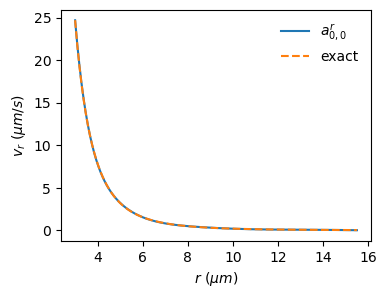

In [8]:
## signle plot 
# function1rN, 2000/r^4
phicof = np.reshape( cof2p,np.prod(np.shape(cof2p)) )
lffrad = base2ptrigo.InitListFunc( Order, FuncRad, VectorRad, phicof )[1]
fig, axs = plt.subplots( 1, 1, figsize=(4,3))
ftz_label = 10
ftz_legend = 10
r = np.linspace(vecr[0],vecr[-1],400)
## inferred terms
axs.plot(r,lffrad[0][0](r),label="$a^r_{0,0}$")
axs.plot(r, 2000/r**4,'--',label='exact') 
axs.set_ylabel('$v_r\\ (\\mu m/s)$',fontsize=ftz_label)
axs.set_xlabel('$r\\ (\\mu m)$',fontsize=ftz_label)
axs.legend(loc='best',frameon=False, fontsize=ftz_legend)